# Implementation of Fang & Oosterle (2008) : A novel pricing method for european options based on Fourier-Cosine series expansions (Part I/II) 

__Quick Tutorial for Jupyter Notebook Usage:__

- To run the whole notebook, simply click __Cell__ in the toolbar above and select __Run All__. You should see some nice plots at the very end.
- You can also run each cell on its own, by selecting it and pressing __Shift+Enter__ 

In [1]:
%matplotlib inline

import cmath   # c stands for complex (to handle complex numbers)
import collections
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

# Approximating different densities

In [2]:
def Fk_function(a,b,k, char_fun):
    """
    Function (9) in the F&O paper
    Args:
        a : float, left border of the trucated integral, e.g.(mean-6*std)
        b : float, right border of the truncated integral, e.g. (mean-6*std)
        k : np.array (vector) 
        char_fun : a characteristic function
        
    Returns:
        Fk, which is used in further functions
    """
    
    # inside our characteristic function \phi
    omega = k * np.pi / (b-a)
    
    # inside the curly braces is our complex number
    complex_number = char_fun(omega, 0) * np.exp(-1j*k*a*np.pi / (b-a))
    
    # .real gets us the real part (written Re in the formula above)
    return 2 / (b-a) * complex_number.real

<img src="figures/f_9.png" width="480">
<img src="figures/f_11.png" width="460">

In [3]:
def f_x(x, a, b, N, char_fun):
    """
    Params:
        x : float, value at which to evaluate f(x)
        values_Fk : np.array of shape (N,) containing the values computed by Fk
        a : float, left border of the trucated integral, e.g. mean-6*std
        b : float, right border of the truncated integral, e.g. mean+6*std
        N: int, should be between 50 and 500
    Returns:
        Approximation of the Inverse Fourier Integral via Cosine Expansion
    """
    
    k = np.arange(0,N)       # vector used to sum over k, i.e. [0,1,2,...,N-1] 
    
    weights = np.ones(N)
    weights[0] = 0.5         # setting first weight to half
    
    Fk = Fk_function(a,b,k, char_fun)

    return sum(weights * Fk * np.cos(k*cmath.pi*(x-a)/(b-a)))


In [4]:
def get_values(a,b,char_fun,N, interval):
    """
    Returns: tuple of two 1-dimensional np.arrays, with corresponding x and y 
             values, where x are evenly spaced values in the given interval
             and y = f_x(x) 
    """
    
    x_values = np.arange(*interval,0.1)
    y_values = np.zeros_like(x_values)
    
    for j, x in enumerate(x_values):
        
        y = f_x(x, a, b, N, char_fun)
        y_values[j] = y
    
    return (x_values, y_values)

## Plotting different densities
### Defining characteristic functions

<img src="figures/char_fun.png" width="380">

In [5]:
# the tau is not needed here, but only to make it compatible with densities
# of option pricing models

def chf_normal(u, tau):
    """
    Credit to:
    http://jpktd.blogspot.ch/2012/12/characteristic-functions-and-scipystats.html
    """
    loc = 0    # the mean
    scale = 1  # the standard deviation
    
    return np.exp(1j * u * loc - 0.5 * u**2 * scale**2)

def chi_sqared(u, tau):
    n = 2      # degrees of freedom
    return 1 / ((1-2*1j*u)**(n/2))

def uniform(u, tau):
    lower_border = -2
    upper_border = 2

    nom = np.exp(1j*u*upper_border)-np.exp(1j*u*lower_border)
    denom = 1j*u*(upper_border-lower_border)

    result = nom/denom
    result[0] = 0
    return result


def single(u, tau):
    a = 0 # we want a single point at a=0
    return np.exp(1j*u*a)
    
def triangular(u, tau):
    result = ( np.sin(u/2) / (u/2) )**2
    result[0] = 0
    
    return result 
    
all_char_functions = [chf_normal, chi_sqared, single, uniform, triangular]

### Simulating for different char functions and different N's

In [6]:
a = -10
b = 10
interval = (-4,4)

all_values = []

for N in (50,500):
    for char_function in all_char_functions:
        all_values.append(get_values(a,b,char_function,N,interval))

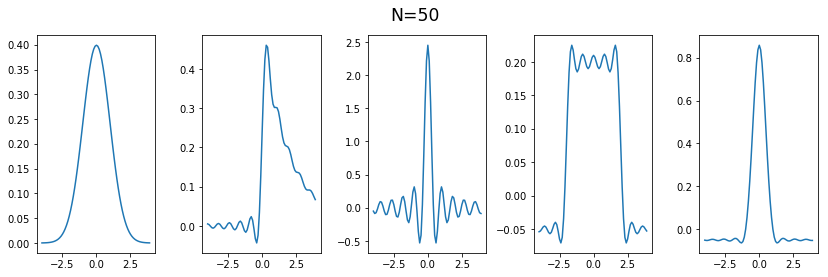

In [7]:
fig = plt.figure(figsize=(14,4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle("N=50", fontsize="xx-large")
for values,j in zip(all_values[:5], range(1, 6)):
    plt.subplot(1, 5, j)
    plt.plot(*values);

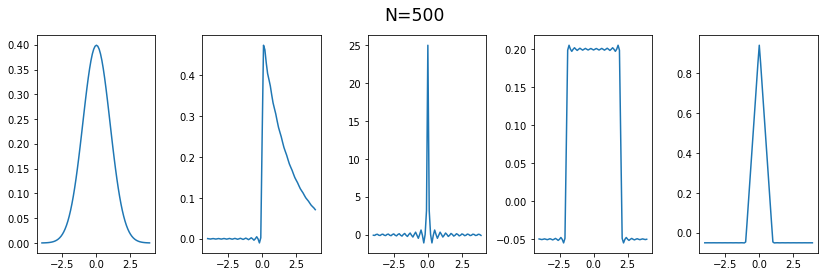

In [8]:
fig2 = plt.figure(figsize=(14,4))
fig2.subplots_adjust(hspace=0.4, wspace=0.4)
fig2.suptitle("N=500", fontsize="xx-large")
for values,j in zip(all_values[5:], range(1, 6)):
    plt.subplot(1, 5, j)
    plt.title("")
    plt.plot(*values);